|Alunos                |Matrícula  |
|----------------------|-----------|
|Caio Bertoldo         |2215080050 |
|Danilo Jorge          |2215080007 |
|Diogo Gomes           |2215080033 |
|Guilherme Montenegro  |2215080011 |
|Leonardo Abinader     |2215080042 |

#### Bibliotecas

In [365]:
import numpy as np
from prettytable import PrettyTable, TableStyle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

#### Ajuste dos dados

In [366]:
dados = np.fromfile('rna-2025.1-pp2.1-dados/dataHoldout.txt')

In [367]:
m = dados.size//3
dados = dados.reshape((m,1,3))

In [368]:
X = np.array([[linha[0][0], linha[0][1]] for linha in dados])
y = np.array([[linha[0][2]] for linha in dados]).ravel()

#### Gráfico do Problema Não-Linearmente Separável

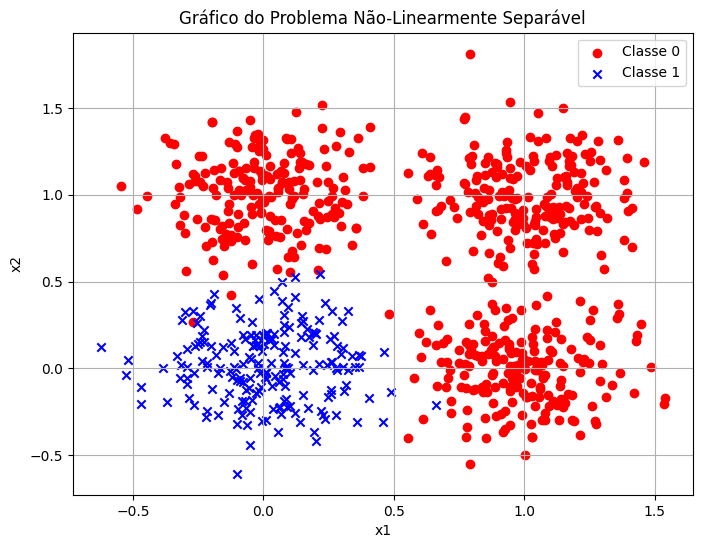

In [369]:
# Separar os pontos por classe
X0 = X[y == 0]
X1 = X[y == 1]

plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], color='red', marker='o', label='Classe 0')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', marker='x', label='Classe 1')

plt.title("Gráfico do Problema Não-Linearmente Separável")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

#### Partição Holdout 70/30

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

#### Perceptron

In [371]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100, weights=None):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = weights
        self.bias = None
        self.necessary_epochs = None
        self.total_adjust = 0
    
    def step(self, x):
        return 1 if x >= 0 else 0

    def check_error(self, y_predicted, y):
        return y_predicted != y

    def fit(self, X, y):
        """A função fit serve para treinar a nossa classe perceptron. Ao longo das épocas, a função realiza previsões e ajuda os pesos e o viés até atingir o número máximo de épocas definido anteriormente ou chegar em uma previsão sem erros.
        A função embaralha os exemplos do conjunto de treinamento a cada época.
        Parâmetros:
            X (np.ndarray): conjunto de treinamento.
            y (np.ndarray): rótulos correspondentes ao conjunto de treinamento.
        Retorna:
            None"""
        if self.weights is None:
            self.weights = np.random.uniform(low=-0.5, high=0.5, size=X.shape[1])
        self.bias = 0
        self.necessary_epochs = 0

        for epoch in range(self.epochs):
            self.necessary_epochs += 1
            error_counter = 0

            # Embaralhando os exemplos do conjunto de treinamento a cada época:
            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for idx, x_i in enumerate(X_shuffled):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)

                if self.check_error(y_predicted, y_shuffled[idx]):
                    update = self.learning_rate * (y_shuffled[idx] - y_predicted)
                    self.weights += update * x_i
                    self.bias += update
                    error_counter += 1
                    self.total_adjust += 1

            if error_counter == 0:
                return

    def predict(self, X):
        return np.array([self.step(np.dot(x_i, self.weights) + self.bias) for x_i in X])


In [372]:
modelo = Perceptron()
modelo.fit(X_train, y_train)

In [373]:
y_pred = modelo.predict(X_test)

#### 1 - Matriz de Confusão (conjunto de testes)

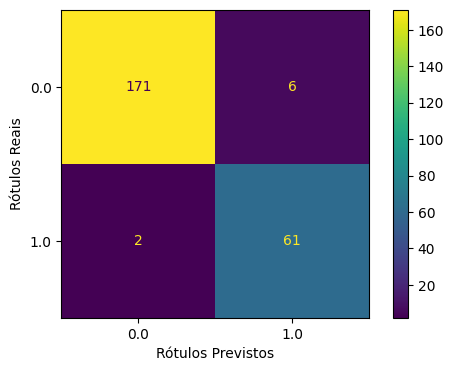

In [374]:
fig, axs = plt.subplots(figsize = (6, 4))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = axs)

axs.set_xlabel("Rótulos Previstos", fontsize = 10)
axs.set_ylabel("Rótulos Reais", fontsize = 10)

axs.tick_params(axis = 'both', labelsize = 10)

plt.show()

#### 2 - Acurácia (conjunto de treinamento)

In [375]:
y_train_pred = modelo.predict(X_train)

acuracia_treinamento = accuracy_score(y_train, y_train_pred)

print(f"Acurácia no conjunto de treinamento: {acuracia_treinamento * 100:.1f}%")

Acurácia no conjunto de treinamento: 95.4%


#### 3 - Precisão, Revocação e F1-Score (conjunto de treinamento)

In [376]:
precisao_treinamento = precision_score(y_train, y_train_pred)
revocacao_treinamento = recall_score(y_train, y_train_pred)
f1_treinamento = f1_score(y_train, y_train_pred)

print(f"Precisão no conjunto de treinamento: {precisao_treinamento * 100:.1f}%")
print(f"Revocação no conjunto de treinamento: {revocacao_treinamento * 100:.1f}%")
print(f"F1-Score no conjunto de treinamento: {f1_treinamento * 100:.1f}%")

Precisão no conjunto de treinamento: 86.3%
Revocação no conjunto de treinamento: 96.4%
F1-Score no conjunto de treinamento: 91.0%


#### 4 - Análise sobre a Qualidade da Solução Perante o Conjunto de Testes

In [377]:
acuracia_testes = accuracy_score(y_test,y_pred)
precisao_testes = precision_score(y_test,y_pred)
revocacao_testes = recall_score(y_test,y_pred)
f1_testes = f1_score(y_test,y_pred)

table = PrettyTable()

table.vertical_char = " "

table.field_names = ["Conjunto de Dados", "Acurácia", "Precisão", "Revocação", "F1-Score"]

table.add_row(["Treinamento", f"{acuracia_treinamento * 100:.1f}%", f"{precisao_treinamento * 100:.1f}%", f"{revocacao_treinamento * 100:.1f}%", f"{f1_treinamento * 100:.1f}%"])
table.add_row(["Testes", f"{acuracia_testes * 100:.1f}%", f"{precisao_testes * 100:.1f}%", f"{revocacao_testes * 100:.1f}%", f"{f1_testes * 100:.1f}%"])

print(table)


+-------------------+----------+----------+-----------+----------+
  Conjunto de Dados   Acurácia   Precisão   Revocação   F1-Score  
+-------------------+----------+----------+-----------+----------+
     Treinamento       95.4%      86.3%       96.4%      91.0%    
        Testes         96.7%      91.0%       96.8%      93.8%    
+-------------------+----------+----------+-----------+----------+


Os resultados encontrados mostram que o Perceptron teve um bom desempenho, analisando todas as métricas, tanto no conjunto de treinamento como no conjunto de testes. Há uma leve queda de desempenho do modelo no conjunto de Testes, apresentando métricas um pouco menores em relação aos dados de treinamento, mas não é uma queda brusca, oque sugere que o modelo não sofre com overfitting.

O Perceptron foi desenvolvido para resolver problemas linearmente separáveis. Ele busca encontrar uma reta que divida perfeitamente os dados em duas classes distintas. O problema apresentado é não-linearmente separável, oque nos faria evitar usar esse modelo para buscar uma solução.

Porém, o nosso Perceptron alcançou métricas bastante satisfatórias. Isso sugere que o problema é quase linearmente separável. Embora a fronteira gerada não seja perfeita, o modelo irá acertar na maioria das vezes.

#### Gráficos com a solução obtida pelo neurônio Perceptron (Conjunto de Treinamento x Conjunto de Testes)

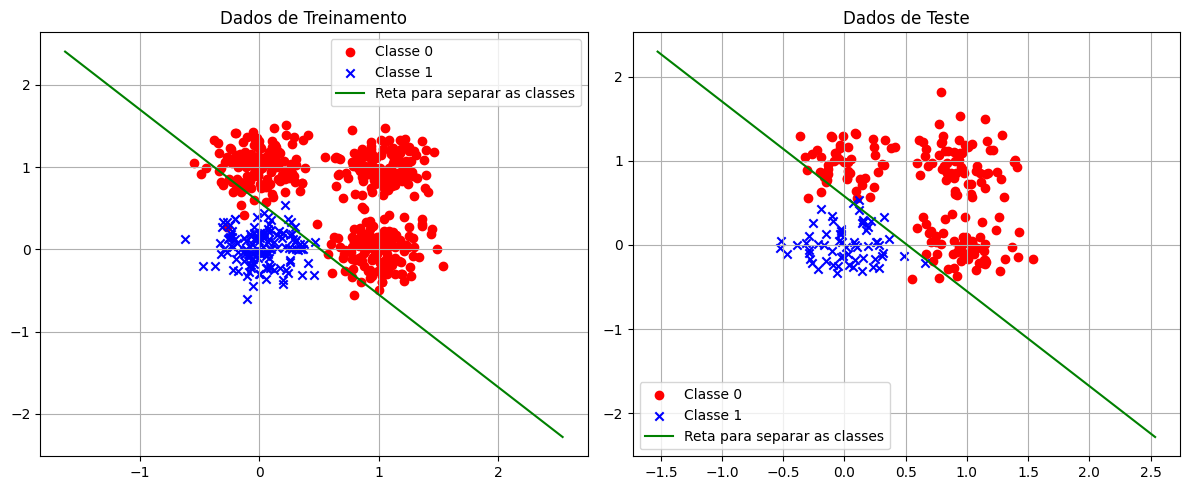

In [378]:
def perceptron_solution(axs, perceptron, X, y, title):
    X0 = X[y == 0]
    X1 = X[y == 1]

    axs.scatter(X0[:, 0], X0[:, 1], c='red', marker='o', label='Classe 0')
    axs.scatter(X1[:, 0], X1[:, 1], c='blue', marker='x', label='Classe 1')
    
    x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    if perceptron.weights[1] != 0: 
        y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
        axs.plot(x_vals, y_vals,color = 'green', label="Reta para separar as classes")

    axs.set_title(title)
    axs.legend()
    axs.grid(True)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

perceptron_solution(axs[0], modelo, X_train, y_train, "Dados de Treinamento")
perceptron_solution(axs[1], modelo, X_test, y_test, "Dados de Teste")

plt.tight_layout()
plt.show()